--epsilon_12 0.5 --epsilon_21 0.5 --nsamples 10000 --dt 0.05 --undersample_factor 5 --seed 42 --x_0sample_factor 5 --seed 42 --x_0 10 15 30

In [28]:
import numpy as np
from utilities import *
from imbalance_gain import *
import matplotlib.pyplot as plt
import pickle

Let's start by loading the trajectory and plotting a chunk of 200 points:

In [ ]:
trajectory = pickle.load(open("dynamical-systems/loz_op1.p", "rb"))
traj_length = trajectory.shape[0]
print(f"Number of time points: {trajectory.shape[0]}")
print(f"Number of components: {trajectory.shape[1]}") # first component is time

Number of time points: 10001
Number of components: 7


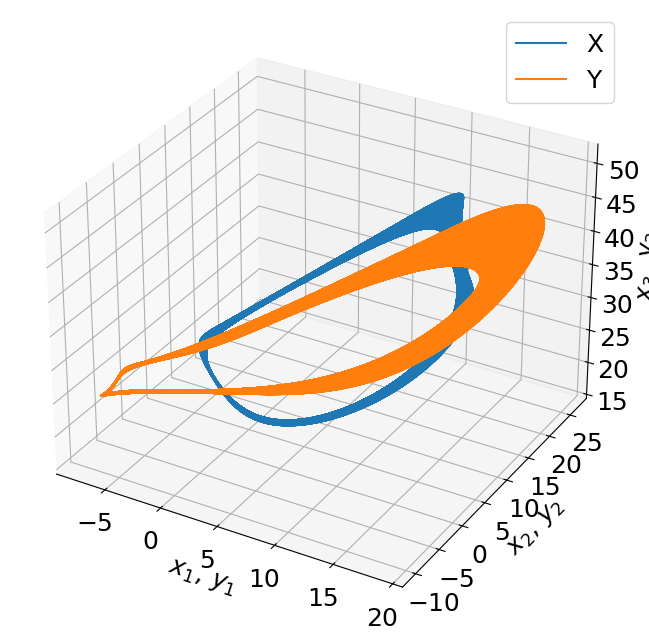

In [30]:
plt.rcParams['font.size'] = 18
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

start_plot = 8000
end_plot = 10000

x_1 = trajectory[start_plot:end_plot,1]
x_2 = trajectory[start_plot:end_plot,2]
x_3 = trajectory[start_plot:end_plot,3]
y_1 = trajectory[start_plot:end_plot,4]
y_2 = trajectory[start_plot:end_plot,5]
y_3 = trajectory[start_plot:end_plot,6]

ax.plot3D(x_1, x_2, x_3, label="X")
ax.plot3D(y_1, y_2, y_3, label="Y")

ax.set_xlabel("$x_1,\,y_1$")
ax.set_ylabel("$x_2,\,y_2$")
ax.set_zlabel("$x_3,\,y_3$")

ax.legend()
plt.show()

In [35]:
tau = 20
N = 2500
sample_times = np.linspace(0,traj_length-tau-1,N,dtype=int)
k = 5
alphas = np.linspace(0,1,50)
n_jobs = 4 #parallelize the calculation for different alphas

Let's compute $\Delta(\alpha)$ in both directions using the functions provided in this repository (https://github.com/vdeltatto/imbalance-gain-causality):

In [36]:
X0 = trajectory[sample_times,1:4]
Y0 = trajectory[sample_times,4:]
rank_matrix_Xtau = compute_rank_matrix(trajectory[sample_times + tau,1:4])
rank_matrix_Ytau = compute_rank_matrix(trajectory[sample_times + tau,4:])

info_imbalances_X_to_Y = scan_alphas(cause_present=X0, effect_present=Y0, rank_matrix_effect_future=rank_matrix_Ytau, 
                                     alphas=alphas, k=k, n_jobs=n_jobs, metric="euclidean")
info_imbalances_Y_to_X = scan_alphas(cause_present=Y0, effect_present=X0, rank_matrix_effect_future=rank_matrix_Xtau, 
                                     alphas=alphas, k=k, n_jobs=n_jobs, metric="euclidean")

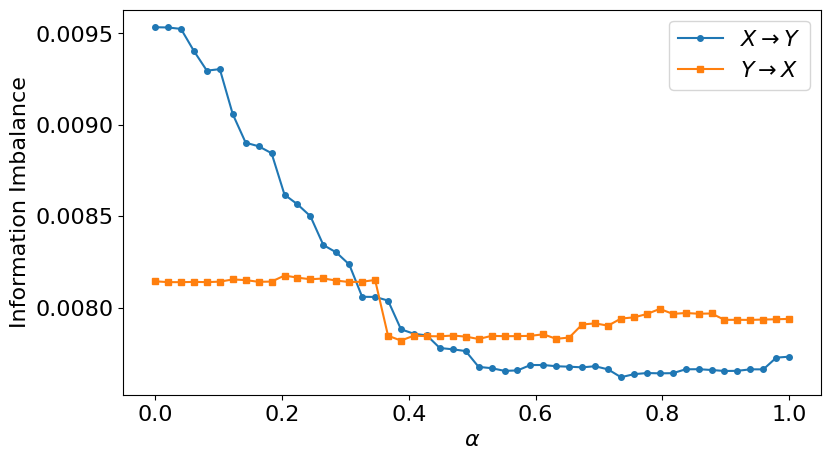

In [37]:
plt.rcParams['font.size'] = 16

plt.figure(figsize=(9,5))
plt.plot(alphas, info_imbalances_X_to_Y, 'o-', markersize=4, label="$X\\rightarrow Y$")
plt.plot(alphas, info_imbalances_Y_to_X, 's-', markersize=4, label="$Y\\rightarrow X$")
plt.xlabel("$\\alpha$")
plt.ylabel("Information Imbalance")
plt.legend()
plt.show()

In [38]:
imbalance_gain_X_to_Y, index_optimal_alpha_X_to_Y = compute_imbalance_gain(info_imbalances_X_to_Y)
imbalance_gain_Y_to_X, index_optimal_alpha_Y_to_X = compute_imbalance_gain(info_imbalances_Y_to_X)

print("Imbalance Gain X -> Y: {:.2f} %".format(100*imbalance_gain_X_to_Y))
print("Imbalance Gain Y -> X: {:.2f} %".format(100*imbalance_gain_Y_to_X))

print("Optimal alpha X -> Y: {:.2f}".format(alphas[index_optimal_alpha_X_to_Y]))
print("Optimal alpha Y -> X: {:.2f}".format(alphas[index_optimal_alpha_Y_to_X]))

Imbalance Gain X -> Y: 20.09 %
Imbalance Gain Y -> X: 3.98 %
Optimal alpha X -> Y: 0.73
Optimal alpha Y -> X: 0.39


In [39]:
from utilities1 import *
from imbalance_gain1 import *

In [40]:
X0 = trajectory[sample_times,1:4]
Y0 = trajectory[sample_times,4:]
rank_matrix_Xtau = compute_rank_matrix_a(trajectory[sample_times + tau,1:4])
rank_matrix_Ytau = compute_rank_matrix_a(trajectory[sample_times + tau,4:])

info_imbalances_X_to_Y = scan_alphas_a(cause_present=X0, effect_present=Y0, rank_matrix_effect_future=rank_matrix_Ytau, 
                                     alphas=alphas, k=k, n_jobs=n_jobs, metric="euclidean")
info_imbalances_Y_to_X = scan_alphas_a(cause_present=Y0, effect_present=X0, rank_matrix_effect_future=rank_matrix_Xtau, 
                                     alphas=alphas, k=k, n_jobs=n_jobs, metric="euclidean")

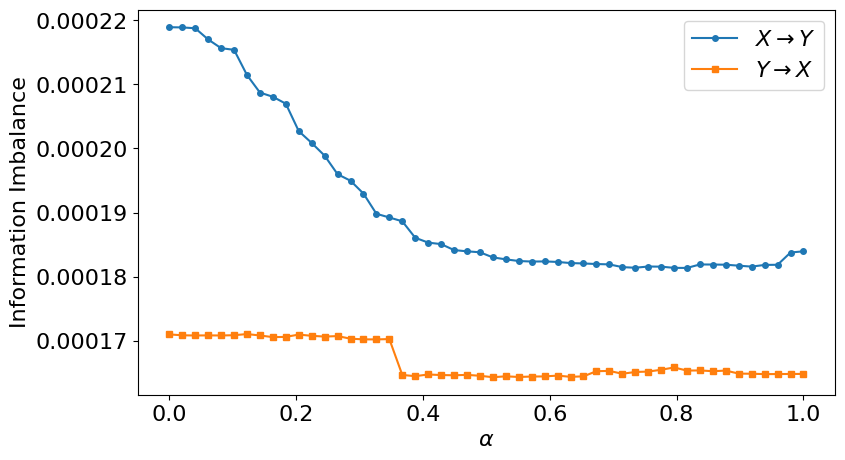

In [41]:
plt.rcParams['font.size'] = 16

plt.figure(figsize=(9,5))
plt.plot(alphas, info_imbalances_X_to_Y, 'o-', markersize=4, label="$X\\rightarrow Y$")
plt.plot(alphas, info_imbalances_Y_to_X, 's-', markersize=4, label="$Y\\rightarrow X$")
plt.xlabel("$\\alpha$")
plt.ylabel("Information Imbalance")
plt.legend()
plt.show()

In [42]:
imbalance_gain_X_to_Y, index_optimal_alpha_X_to_Y = compute_imbalance_gain(info_imbalances_X_to_Y)
imbalance_gain_Y_to_X, index_optimal_alpha_Y_to_X = compute_imbalance_gain(info_imbalances_Y_to_X)

print("Imbalance Gain X -> Y: {:.2f} %".format(100*imbalance_gain_X_to_Y))
print("Imbalance Gain Y -> X: {:.2f} %".format(100*imbalance_gain_Y_to_X))

print("Optimal alpha X -> Y: {:.2f}".format(alphas[index_optimal_alpha_X_to_Y]))
print("Optimal alpha Y -> X: {:.2f}".format(alphas[index_optimal_alpha_Y_to_X]))

Imbalance Gain X -> Y: 17.16 %
Imbalance Gain Y -> X: 3.91 %
Optimal alpha X -> Y: 0.82
Optimal alpha Y -> X: 0.51
